In [147]:
# importing nessary modules
import pandas as pd
import numpy as np


In [176]:
# reading the csv
df = pd.read_csv('flipkart_rating_review.csv')
df

,Rate,Review,Summary,Sentiment
0,4,pretty good,awsm,positive
1,5,simply awesome,nice product and hd picture,positive
2,5,worth every penny,super,positive
3,4,pretty good,good product nice price i,positive
4,5,terrific,good,positive
...,...,...,...,...
99995,2,expected a better product,not smooth and comfortable to use,negative
99996,5,fabulous!,it s really value for money,positive
99997,5,great product,nice,positive
99998,5,not specified,very good product,positive


In [3]:
df['Rate'].isnull().sum()

0

In [4]:
df['Review'].isnull().sum()

0

In [5]:
df['Summary'].isnull().sum()

0

In [6]:
df['Sentiment'].isnull().sum()

0

In [3]:
df['Summary'][99999]

'size is small in comparison to other cones smell is good'

In [178]:
# founded a error in the rate column
df['Rate'].value_counts()

Rate
5                                                                    58478
4                                                                    20595
1                                                                    10059
3                                                                     7775
2                                                                     3090
Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿(Grey & Turquoise)        1
Bajaj DX 2 L/W Dry Iron                                                  1
Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)             1
Name: count, dtype: int64

In [179]:
# removing the unnessary values from the rate column 

In [198]:
df.drop(df[df['Rate']== "Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿(Grey & Turquoise)"].index, inplace=True)

In [199]:
df.drop(df[df['Rate']=="Bajaj DX 2 L/W Dry Iron"].index, inplace= True)

In [200]:
df.drop(df[df['Rate']=="Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)"].index, inplace= True)

In [201]:
df['Rate'].value_counts()

Rate
5    58478
4    20595
1    10059
3     7775
2     3090
Name: count, dtype: int64

In [202]:
df['Rate']= df['Rate'].astype(int)

In [9]:
df['Rate']

0        4
1        5
2        5
3        4
4        5
        ..
99995    2
99996    5
99997    5
99998    5
99999    3
Name: Rate, Length: 99997, dtype: int32

In [10]:
df[df['Sentiment']=="negative"]

,Rate,Review,Summary,Sentiment
11,1,unsatisfactory,worst experience with flipkart,negative
23,1,low quality,low quality and it broken in 1 day,negative
25,1,don't waste your money,worst product very low pressure flow of water ...,negative
36,1,waste of money!,poor,negative
47,2,moderate,it broke within month,negative
...,...,...,...,...
99974,3,does the job,filmsy bad deal,negative
99975,1,worst experience ever!,worst body broken,negative
99983,1,useless product,very poor materials last rate 300only,negative
99987,1,utterly disappointed,this product is worst product in bajaj flipkar...,negative


In [184]:
# encoding the sentiment label using labelEncoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Sentiment_label'] = lb.fit_transform(df['Sentiment'])
df

,Rate,Review,Summary,Sentiment,Sentiment_label
0,4,pretty good,awsm,positive,2
1,5,simply awesome,nice product and hd picture,positive,2
2,5,worth every penny,super,positive,2
3,4,pretty good,good product nice price i,positive,2
4,5,terrific,good,positive,2
...,...,...,...,...,...
99995,2,expected a better product,not smooth and comfortable to use,negative,0
99996,5,fabulous!,it s really value for money,positive,2
99997,5,great product,nice,positive,2
99998,5,not specified,very good product,positive,2


In [12]:
T = df[df['Sentiment_label']==1]
T['Rate'].mean()

3.3273104880581514

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
# 
temp_df = df.loc[0:3000]

In [153]:
temp_df

,Rate,Review,Summary,Sentiment
0,4,pretty good,awsm,positive
1,5,simply awesome,nice product and hd picture,positive
2,5,worth every penny,super,positive
3,4,pretty good,good product nice price i,positive
4,5,terrific,good,positive
...,...,...,...,...
2996,4,really nice,wow its cool,positive
2997,5,mind-blowing purchase,good tv,positive
2998,5,brilliant,it is very good and good pages easily to read ...,positive
2999,4,good quality product,functioning good all bottoms are working properly,positive


In [189]:
total = df['Sentiment'].count()

In [190]:
df_pos = df[df['Sentiment']=="positive"].count()
df_pos

Rate               81691
Review             81691
Summary            81691
Sentiment          81691
Sentiment_label    81691
dtype: int64

In [191]:
df_neg = df[df['Sentiment']=='negative'].count()[0]

In [192]:
df_neu = df[df['Sentiment']=='neutral'].count()[0]

In [193]:
# calculating the percentage of positve labels
pos_percentage = (df_pos[0]/total)*100
pos_percentage

81.6934508035241

In [194]:
# calculating the percentage of negative labels
neg_percentage = (df_neg/total)*100
neg_percentage

13.491404742142265

In [195]:
# calculating the percentage of neutral labels
neu_percentage= (df_neu/total)*100
neu_percentage

4.81514445433363

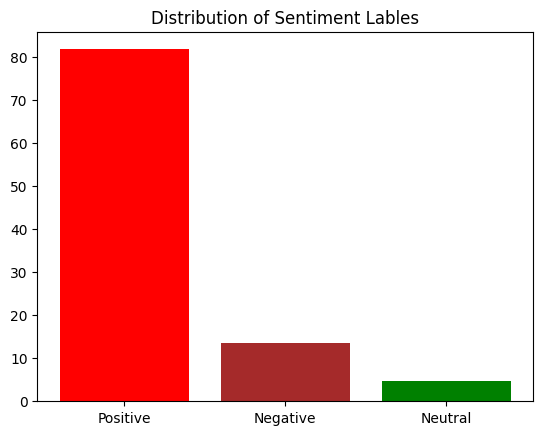

In [196]:
percentages = {'Positive': pos_percentage, 'Negative': neg_percentage, 'Neutral': neu_percentage}
plt.bar(percentages.keys(), percentages.values(), color= ['red', 'brown', 'green'])
plt.title("Distribution of Sentiment Lables")
plt.show()

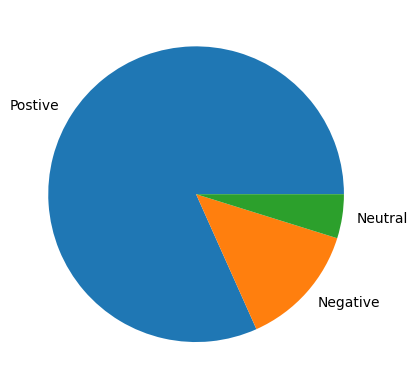

In [109]:
plt.pie([pos_percentage, neg_percentage, neu_percentage], labels= ['Postive', 'Negative', 'Neutral'])
plt.show()

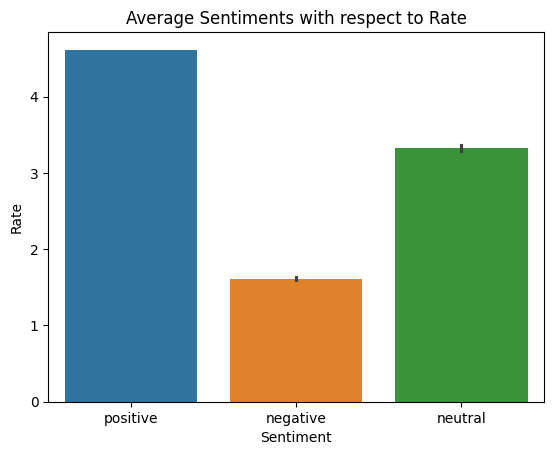

In [205]:
sns.barplot(x= 'Sentiment', y= 'Rate', data = df, hue = 'Sentiment')
plt.title('Average Sentiments with respect to Rate')
plt.show()

In [121]:
rate = df[df['Sentiment']=="negative"]

In [15]:
df['Rate'].value_counts()

Rate
5    58478
4    20595
1    10059
3     7775
2     3090
Name: count, dtype: int64

## Preparing the Model 

In [13]:
# removing the stop words
import spacy

In [14]:
nlp = spacy.load('en_core_web_sm')

In [15]:
text = "There is a pen on the table"
doc = nlp(text)
doc.text

'There is a pen on the table'

In [16]:
# trying before implementation
for i in nlp(text):
    if i.is_stop:
        print(i)

There
is
a
on
the


In [17]:
# using nlp.pipe() for faster implementation
def clean_text(doc):
    return ' '.join(
        token.lemma_.lower() 
        for token in doc 
        if not token.is_stop and not token.is_punct
    )


cleaned_summaries = []
for i in nlp.pipe(df['Summary'].values, batch_size=1000, n_process=4):
    cleaned_summaries.append(clean_text(i))
    

df['Summary'] = cleaned_summaries
del cleaned_summaries

In [18]:
from gensim.models import Word2Vec, KeyedVectors
from nltk.tokenize import word_tokenize
import nltk

In [43]:
nltk.download('punkt')
nltk.download('punkt_tab')

In [22]:
df['tokenize'] = df['Summary'].apply(word_tokenize)


In [19]:
model_for_word_to_vec = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz',binary=True,limit=500000)

In [20]:
model_for_word_to_vec.most_similar('top', topn=3)

[('Top', 0.698654294013977),
 ('topmost', 0.550675094127655),
 ('tops', 0.5368965268135071)]

In [23]:
def rev_to_vec(tokens, model, vector_size=300):
    vectors = []
    for word in tokens:
        if word in model:
            vectors.append(model[word])
    
    if len(vectors)==0:
        return np.zeros(vector_size)
    
    return np.mean(vectors, axis=0)

df['vector'] = df['tokenize'].apply(lambda x: rev_to_vec(x, model_for_word_to_vec))

df

,Rate,Review,Summary,Sentiment,Sentiment_label,tokenize,vector
0,4,pretty good,awsm,positive,2,[awsm],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,5,simply awesome,nice product hd picture,positive,2,"[nice, product, hd, picture]","[-0.048339844, 0.15209961, -0.04272461, 0.0702..."
2,5,worth every penny,super,positive,2,[super],"[0.096191406, 0.14746094, 0.091308594, 0.07812..."
3,4,pretty good,good product nice price,positive,2,"[good, product, nice, price]","[0.06970215, 0.059143066, -0.06442261, 0.17626..."
4,5,terrific,good,positive,2,[good],"[0.040527344, 0.0625, -0.017456055, 0.07861328..."
...,...,...,...,...,...,...,...
99995,2,expected a better product,smooth comfortable use,negative,0,"[smooth, comfortable, use]","[0.04683431, 0.030192057, -0.123535156, 0.0171..."
99996,5,fabulous!,s value money,positive,2,"[s, value, money]","[-0.017740885, 0.08292643, 0.075276695, 0.1092..."
99997,5,great product,nice,positive,2,[nice],"[0.15820312, 0.10595703, -0.18945312, 0.386718..."
99998,5,not specified,good product,positive,2,"[good, product]","[-0.010498047, 0.07885742, 0.058166504, 0.0717..."


In [53]:
# apply the model

x= np.array(df['vector'].tolist())
y= df['Sentiment_label'].values
print(x.shape)
print(type(y))
print(type(x))

(99997, 300)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## KNN Model

In [74]:
# applying knn model

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_train

array([[-0.02929688,  0.05289714, -0.01882935, ...,  0.02360026,
        -0.18847656, -0.00298055],
       [ 0.14257812,  0.07226562,  0.03027344, ..., -0.14160156,
         0.03442383, -0.15234375],
       [ 0.04488118, -0.07906087, -0.10508219, ..., -0.05304972,
        -0.03117243, -0.04699707],
       ...,
       [ 0.04052734,  0.0625    , -0.01745605, ..., -0.15625   ,
         0.00193024, -0.06982422],
       [ 0.04052734,  0.0625    , -0.01745605, ..., -0.15625   ,
         0.00193024, -0.06982422],
       [ 0.00274658,  0.04238892, -0.01010132, ..., -0.08013916,
         0.00810528, -0.10496521]])

In [55]:
# using cross validation for knn(kfold)
k=10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(knn_model, x_train, y_train, cv=kf, scoring= 'accuracy')
print(scores)
avg_acc = np.mean(scores)
print(avg_acc)

[0.89525    0.896      0.89625    0.89625    0.897625   0.89175
 0.8905     0.89086136 0.89161145 0.89561195]
0.8941709760595075


In [99]:
# using k=3 
knn_model= KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)
y_pred= knn_model.predict(x_test)
y_pred
accur = accuracy_score(y_test, y_pred)
print(f"the accuracy using KNN is-> {accur}")


the accuracy using KNN is-> 0.89285


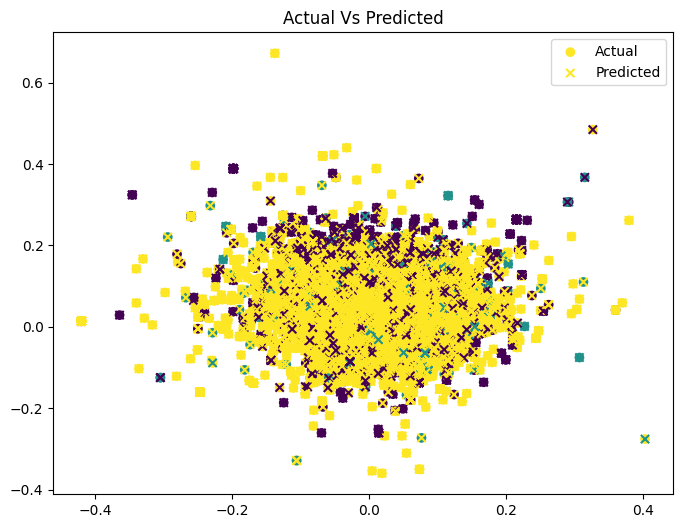

In [68]:
plt.figure(figsize= (8,6))
plt.scatter(x_test[:,0], x_test[:,1], c = y_test, label= "Actual" )
plt.scatter(x_test[:,0], x_test[:,1], c= y_pred, label = "Predicted", marker="x")
plt.legend()
plt.title("Actual Vs Predicted")
plt.show()

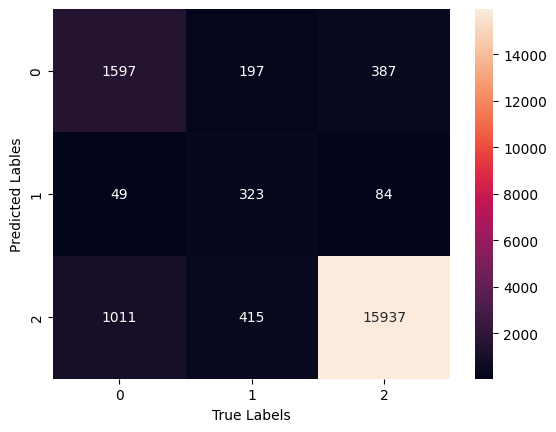

In [100]:
# confusion matrix for knn
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cmt = cm.T
sns.heatmap(cmt, annot=True, fmt= 'd')
plt.xlabel('True Labels')
plt.ylabel('Predicted Lables')
plt.show()

In [101]:
# classification report for KNN
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.60      0.66      2657
           1       0.71      0.35      0.46       935
           2       0.92      0.97      0.94     16408

    accuracy                           0.89     20000
   macro avg       0.79      0.64      0.69     20000
weighted avg       0.88      0.89      0.88     20000



## Random Forest

In [102]:
# using Random Forest
from sklearn.ensemble import RandomForestClassifier
x_train ,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
model = RandomForestClassifier(criterion='gini', n_estimators= 100, random_state=42)
model.fit(x_train, y_train)

y_pred= model.predict(x_test)
score = accuracy_score(y_test, y_pred)
print(f"Accuracy score using Random Forest is {score}")

Accuracy score using Random Forest is 0.905


In [103]:
y_pred

array([2, 0, 2, ..., 2, 2, 2])

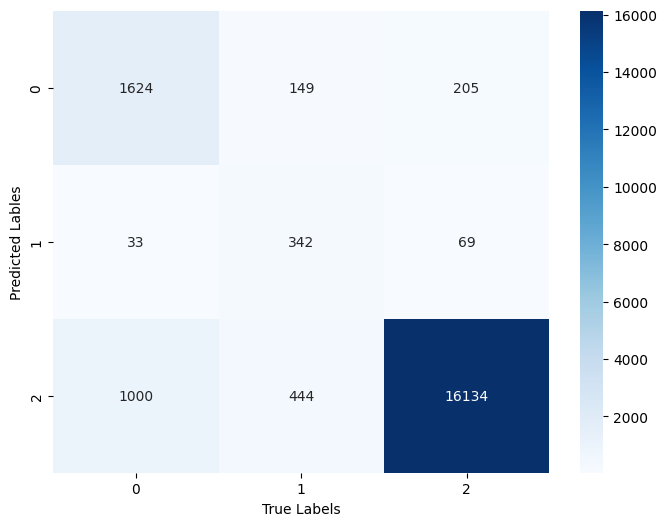

In [104]:
from sklearn.metrics import confusion_matrix, classification_report
# confusion matrix for random forest 
cm= confusion_matrix(y_test, y_pred)
cmt = cm.T
plt.figure(figsize=(8,6))
sns.heatmap(cmt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True Labels')
plt.ylabel('Predicted Lables')
plt.show()

In [105]:
# classification report for random forest
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.61      0.70      2657
           1       0.77      0.37      0.50       935
           2       0.92      0.98      0.95     16408

    accuracy                           0.91     20000
   macro avg       0.84      0.65      0.72     20000
weighted avg       0.90      0.91      0.90     20000



## Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class = 'multinomial', solver= 'lbfgs', max_iter=1000, class_weight='balanced')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc_score = accuracy_score(y_test, y_pred)
print("The accuracy using logistic regression is-> ",acc_score)

C:\Users\hiteshlalwani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


The accuracy using logistic regression is->  0.8157


In [92]:
# classification report for logistic regression 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.76      0.67      2657
           1       0.24      0.65      0.35       935
           2       0.97      0.83      0.90     16408

    accuracy                           0.82     20000
   macro avg       0.60      0.75      0.64     20000
weighted avg       0.89      0.82      0.84     20000



## XGBoost Classifier

In [106]:
from xgboost import XGBClassifier
model = XGBClassifier(
        objective='multi:softmax',
        num_class = 3,
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytes= 0.8,
        random_state= 42
)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = accuracy_score(y_test, y_pred)
print(f"the accuracy score using XGBoost is {score}")

C:\Users\hiteshlalwani\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:36:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytes" } are not used.

  warnings.warn(smsg, UserWarning)


the accuracy score using XGBoost is 0.9108


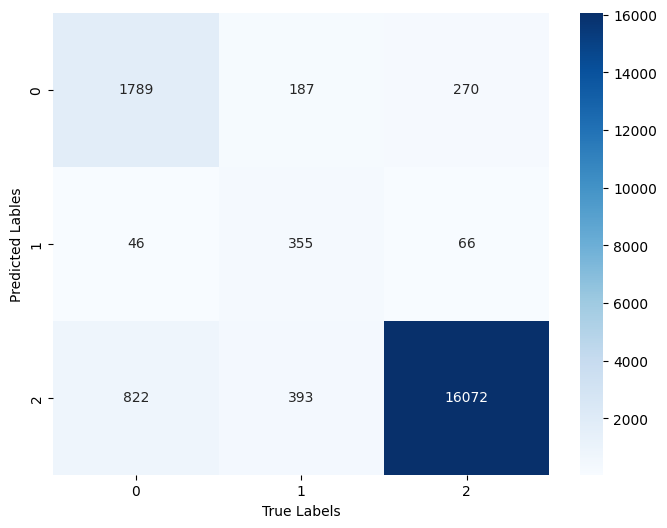

In [107]:
# confusion matrix of XGboost

cm= confusion_matrix(y_test, y_pred)
cmt = cm.T
plt.figure(figsize=(8,6))
sns.heatmap(cmt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True Labels')
plt.ylabel('Predicted Lables')
plt.show()

In [108]:
# classification report of xgboost
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73      2657
           1       0.76      0.38      0.51       935
           2       0.93      0.98      0.95     16408

    accuracy                           0.91     20000
   macro avg       0.83      0.68      0.73     20000
weighted avg       0.90      0.91      0.90     20000



In [110]:
y_pred

array([2, 0, 2, ..., 2, 2, 2])

## Storing the model using pickle 

In [109]:
import pickle
pickle.dump(model, open('Review_sentiment.pkl', 'wb'))